                        COMP-2704: Supervised Machine Learning

                        Project – data analysis and preparation

1) Stating the use case:

After the model is being built, it could be used to detect which species are most likely to become extinct based on the records from previous years and the climatic factors, land use along with various other features affecting this extinction in the Alpine regions of Canada. It could be used in the future maybe by conservational departments across Canada to preserve nature’s diversity by predicting the endangered species of birds and thus, preserving those extictions by taking preventive measures.

In this use case, False Positives are more important as a bird predicted to be present when it's actually not present will lead the scientists to think that the bird belonging to that particular species does not come under endangered species, when it actually is on the verge of extincition and thus, no preventive measures will be taken to preserve it, which will eventually lead to loss of diversity. Hence, any of the false positive values must be avoided.

In this particular scenario, RMSE could be the perfect metric in comparing two different models.

2) Cleaning the data:

In [32]:
import pandas as pd
birds = pd.read_csv('Alpine_Birds.csv', encoding = 'Windows-1252')
birds.head()


,Ecoregion,Park,Point transect name,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Common_Name,Scientific_Name,Number of Birds Detected from 0-3:20 (minutes),Number of Birds Detected from 3:20-6:40 (minutes),Number of Birds Detected from 6:40-10:00 (minutes),Behaviour,Easting coordinate,Northing coordinate
0,Alpine,GNP,Abbott Ridge,3,2334.0,2014,7,9,14.8,clear,1.6,PINE SISKIN,Carduelis pinus,1,1,2,Calling,464268,5677100
1,Alpine,GNP,Abbott Ridge,3,2334.0,2016,6,28,10.6,Broken,0.0,TOWNSEND'S SOLITAIRE,Myadestes townsendi,1,1,1,Singing,464268,5677100
2,Alpine,GNP,Abbott Ridge,3,2334.0,2018,7,8,11.3,broken,0.0,AMERICAN PIPIT,Anthus spinoletta,0,1,0,Singing,464268,5677100
3,Alpine,GNP,Abbott Ridge,3,2334.0,2018,7,8,11.3,broken,0.0,SWAINSON'S THRUSH,Catharus ustulatus,0,0,1,Calling,464268,5677100
4,Alpine,GNP,Abbott Ridge,3,2334.0,2019,7,12,9.5,Broken,9.0,PINE SISKIN,Carduelis pinus,3,0,1,Calling,464268,5677100


In [33]:
birds.isna().sum()

Ecoregion                                               0
Park                                                    0
Point transect name                                     0
Point transect identification                           0
Elevation (m)                                          68
Year                                                    0
Month                                                   0
Day                                                     0
Temperature (Celcius)                                 103
Sky condition                                           0
Wind speed (km/h)                                      57
Common_Name                                             0
Scientific_Name                                        58
Number of Birds Detected from 0-3:20 (minutes)          0
Number of Birds Detected from 3:20-6:40 (minutes)       0
Number of Birds Detected from 6:40-10:00 (minutes)      0
Behaviour                                               1
Easting coordi

In [34]:
# filling missing values for elevation
birds = pd.DataFrame(birds)
birds['Elevation (m)'] = pd.to_numeric(birds['Elevation (m)'])
temp_birds = birds.dropna(subset = ['Elevation (m)'])
# temp_birds.head()
ele_mean = temp_birds['Elevation (m)'].mean()
birds = birds.fillna({'Elevation (m)': ele_mean})
birds.head()


,Ecoregion,Park,Point transect name,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Common_Name,Scientific_Name,Number of Birds Detected from 0-3:20 (minutes),Number of Birds Detected from 3:20-6:40 (minutes),Number of Birds Detected from 6:40-10:00 (minutes),Behaviour,Easting coordinate,Northing coordinate
0,Alpine,GNP,Abbott Ridge,3,2334.0,2014,7,9,14.8,clear,1.6,PINE SISKIN,Carduelis pinus,1,1,2,Calling,464268,5677100
1,Alpine,GNP,Abbott Ridge,3,2334.0,2016,6,28,10.6,Broken,0.0,TOWNSEND'S SOLITAIRE,Myadestes townsendi,1,1,1,Singing,464268,5677100
2,Alpine,GNP,Abbott Ridge,3,2334.0,2018,7,8,11.3,broken,0.0,AMERICAN PIPIT,Anthus spinoletta,0,1,0,Singing,464268,5677100
3,Alpine,GNP,Abbott Ridge,3,2334.0,2018,7,8,11.3,broken,0.0,SWAINSON'S THRUSH,Catharus ustulatus,0,0,1,Calling,464268,5677100
4,Alpine,GNP,Abbott Ridge,3,2334.0,2019,7,12,9.5,Broken,9.0,PINE SISKIN,Carduelis pinus,3,0,1,Calling,464268,5677100


In [35]:
# Filling missing values for Temperature
temp_temp = birds.dropna(subset = ['Temperature (Celcius)'])
temp_mean = temp_temp['Temperature (Celcius)'].mean()
birds = birds.fillna({'Temperature (Celcius)': temp_mean})

# Dealing with missing values for wind speed 
temp_wind = birds.dropna(subset = 'Wind speed (km/h)')
wind_mean = temp_wind['Wind speed (km/h)'].mean()
birds = birds.fillna({'Wind speed (km/h)': wind_mean})

# dealing with missing values in Scientific_Name and Behaviour column 
# here, it's better to drop these columns as we won't need them to predict the number of birds present
birds = birds.drop(['Scientific_Name', 'Behaviour'], axis = 1)
birds.isna().sum() # to verify if we have correctly dealt with the null values

Ecoregion                                             0
Park                                                  0
Point transect name                                   0
Point transect identification                         0
Elevation (m)                                         0
Year                                                  0
Month                                                 0
Day                                                   0
Temperature (Celcius)                                 0
Sky condition                                         0
Wind speed (km/h)                                     0
Common_Name                                           0
Number of Birds Detected from 0-3:20 (minutes)        0
Number of Birds Detected from 3:20-6:40 (minutes)     0
Number of Birds Detected from 6:40-10:00 (minutes)    0
Easting coordinate                                    0
Northing coordinate                                   0
dtype: int64

3) Describing the data:

In [36]:
birds.describe()

,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Wind speed (km/h),Number of Birds Detected from 0-3:20 (minutes),Number of Birds Detected from 3:20-6:40 (minutes),Number of Birds Detected from 6:40-10:00 (minutes),Easting coordinate,Northing coordinate
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,7.830000e+02
mean,7.132822,2226.577622,2018.275862,6.782886,14.374202,12.662500,2.952204,0.873563,0.822478,0.809706,471579.914432,5.681686e+06
std,4.420972,115.086871,2.582256,0.412544,7.669263,3.617416,2.485099,0.758989,0.753784,0.745529,9594.465503,6.856159e+03
min,1.000000,2059.000000,2013.000000,6.000000,4.000000,0.500000,0.000000,0.000000,0.000000,0.000000,450143.000000,5.665262e+06
25%,3.000000,2113.000000,2016.000000,7.000000,9.000000,10.300000,1.100000,0.000000,0.000000,0.000000,463089.000000,5.677100e+06
50%,7.000000,2223.000000,2019.000000,7.000000,13.000000,12.662500,2.400000,1.000000,1.000000,1.000000,477185.000000,5.681551e+06
75%,10.500000,2269.000000,2021.000000,7.000000,21.000000,15.000000,4.500000,1.000000,1.000000,1.000000,478009.000000,5.681723e+06
max,19.000000,2533.000000,2021.000000,7.000000,30.000000,25.000000,15.000000,5.000000,5.000000,5.000000,482197.000000,5.694690e+06


In [37]:
birds = birds.drop(['Ecoregion', 'Park', 'Point transect name', 'Common_Name'], axis = 1)
# These are the columns having String values that we don't really need for prediction, 
# so it's a better idea to drop them



In [38]:
birds['Sky condition'].value_counts()

Sky condition
Clear        284
clear        170
Scattered    136
Broken        57
Overcast      43
scattered     42
broken        33
Obscured      18
Name: count, dtype: int64

In [39]:
birds.loc[birds['Sky condition'] == 'Clear', 'Sky condition'] = 0
birds.loc[birds['Sky condition'] == 'clear', 'Sky condition'] = 0
birds.loc[birds['Sky condition'] == 'Scattered', 'Sky condition'] = 1
birds.loc[birds['Sky condition'] == 'scattered', 'Sky condition'] = 1
birds.loc[birds['Sky condition'] == 'Broken', 'Sky condition'] = 2
birds.loc[birds['Sky condition'] == 'broken', 'Sky condition'] = 2
birds.loc[birds['Sky condition'] == 'Overcast', 'Sky condition'] = 3
birds.loc[birds['Sky condition'] == 'Obscured', 'Sky condition'] = 4


In [40]:
correlation = birds.corr(method = 'pearson')
print(correlation)

                                                    Point transect identification  \
Point transect identification                                            1.000000   
Elevation (m)                                                            0.155183   
Year                                                                     0.062875   
Month                                                                    0.031257   
Day                                                                     -0.063774   
Temperature (Celcius)                                                    0.074753   
Sky condition                                                            0.044726   
Wind speed (km/h)                                                       -0.025475   
Number of Birds Detected from 0-3:20 (minutes)                          -0.017093   
Number of Birds Detected from 3:20-6:40 (minutes)                       -0.004427   
Number of Birds Detected from 6:40-10:00 (minutes)               

4) Creating visualizations:

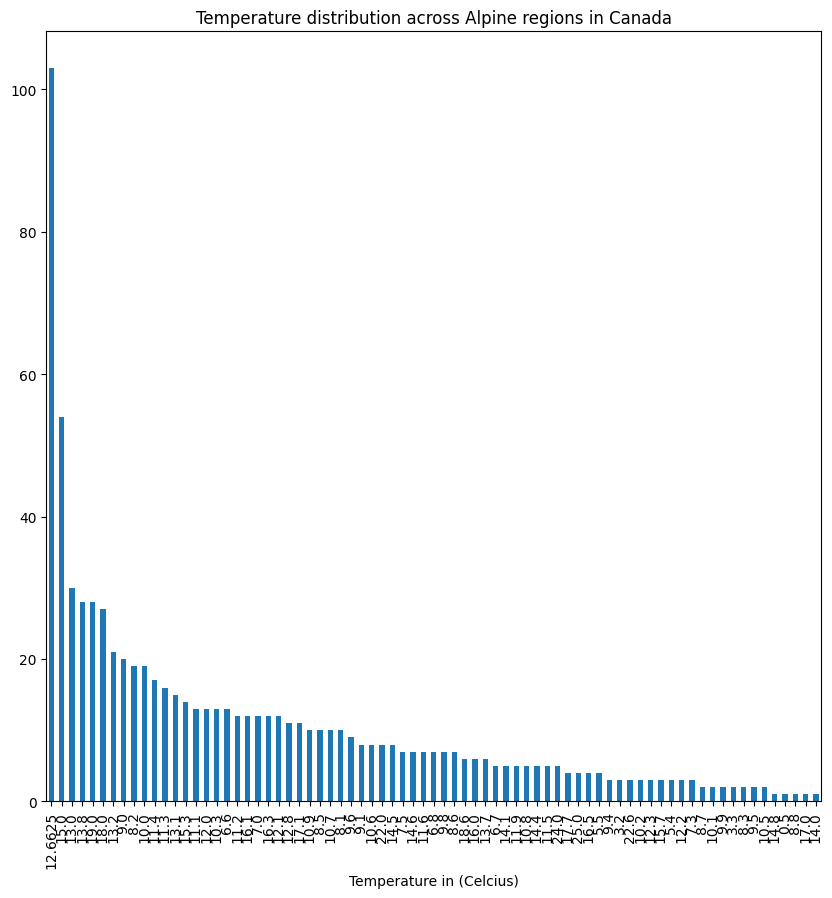

In [10]:
import matplotlib.pyplot as plt
temp_counts = birds['Temperature (Celcius)'].value_counts()
plt.figure(figsize = (10, 10))
temp_counts.plot(kind = 'bar')
plt.xlabel('Temperature in (Celcius)')
plt.title('Temperature distribution across Alpine regions in Canada')
plt.show()

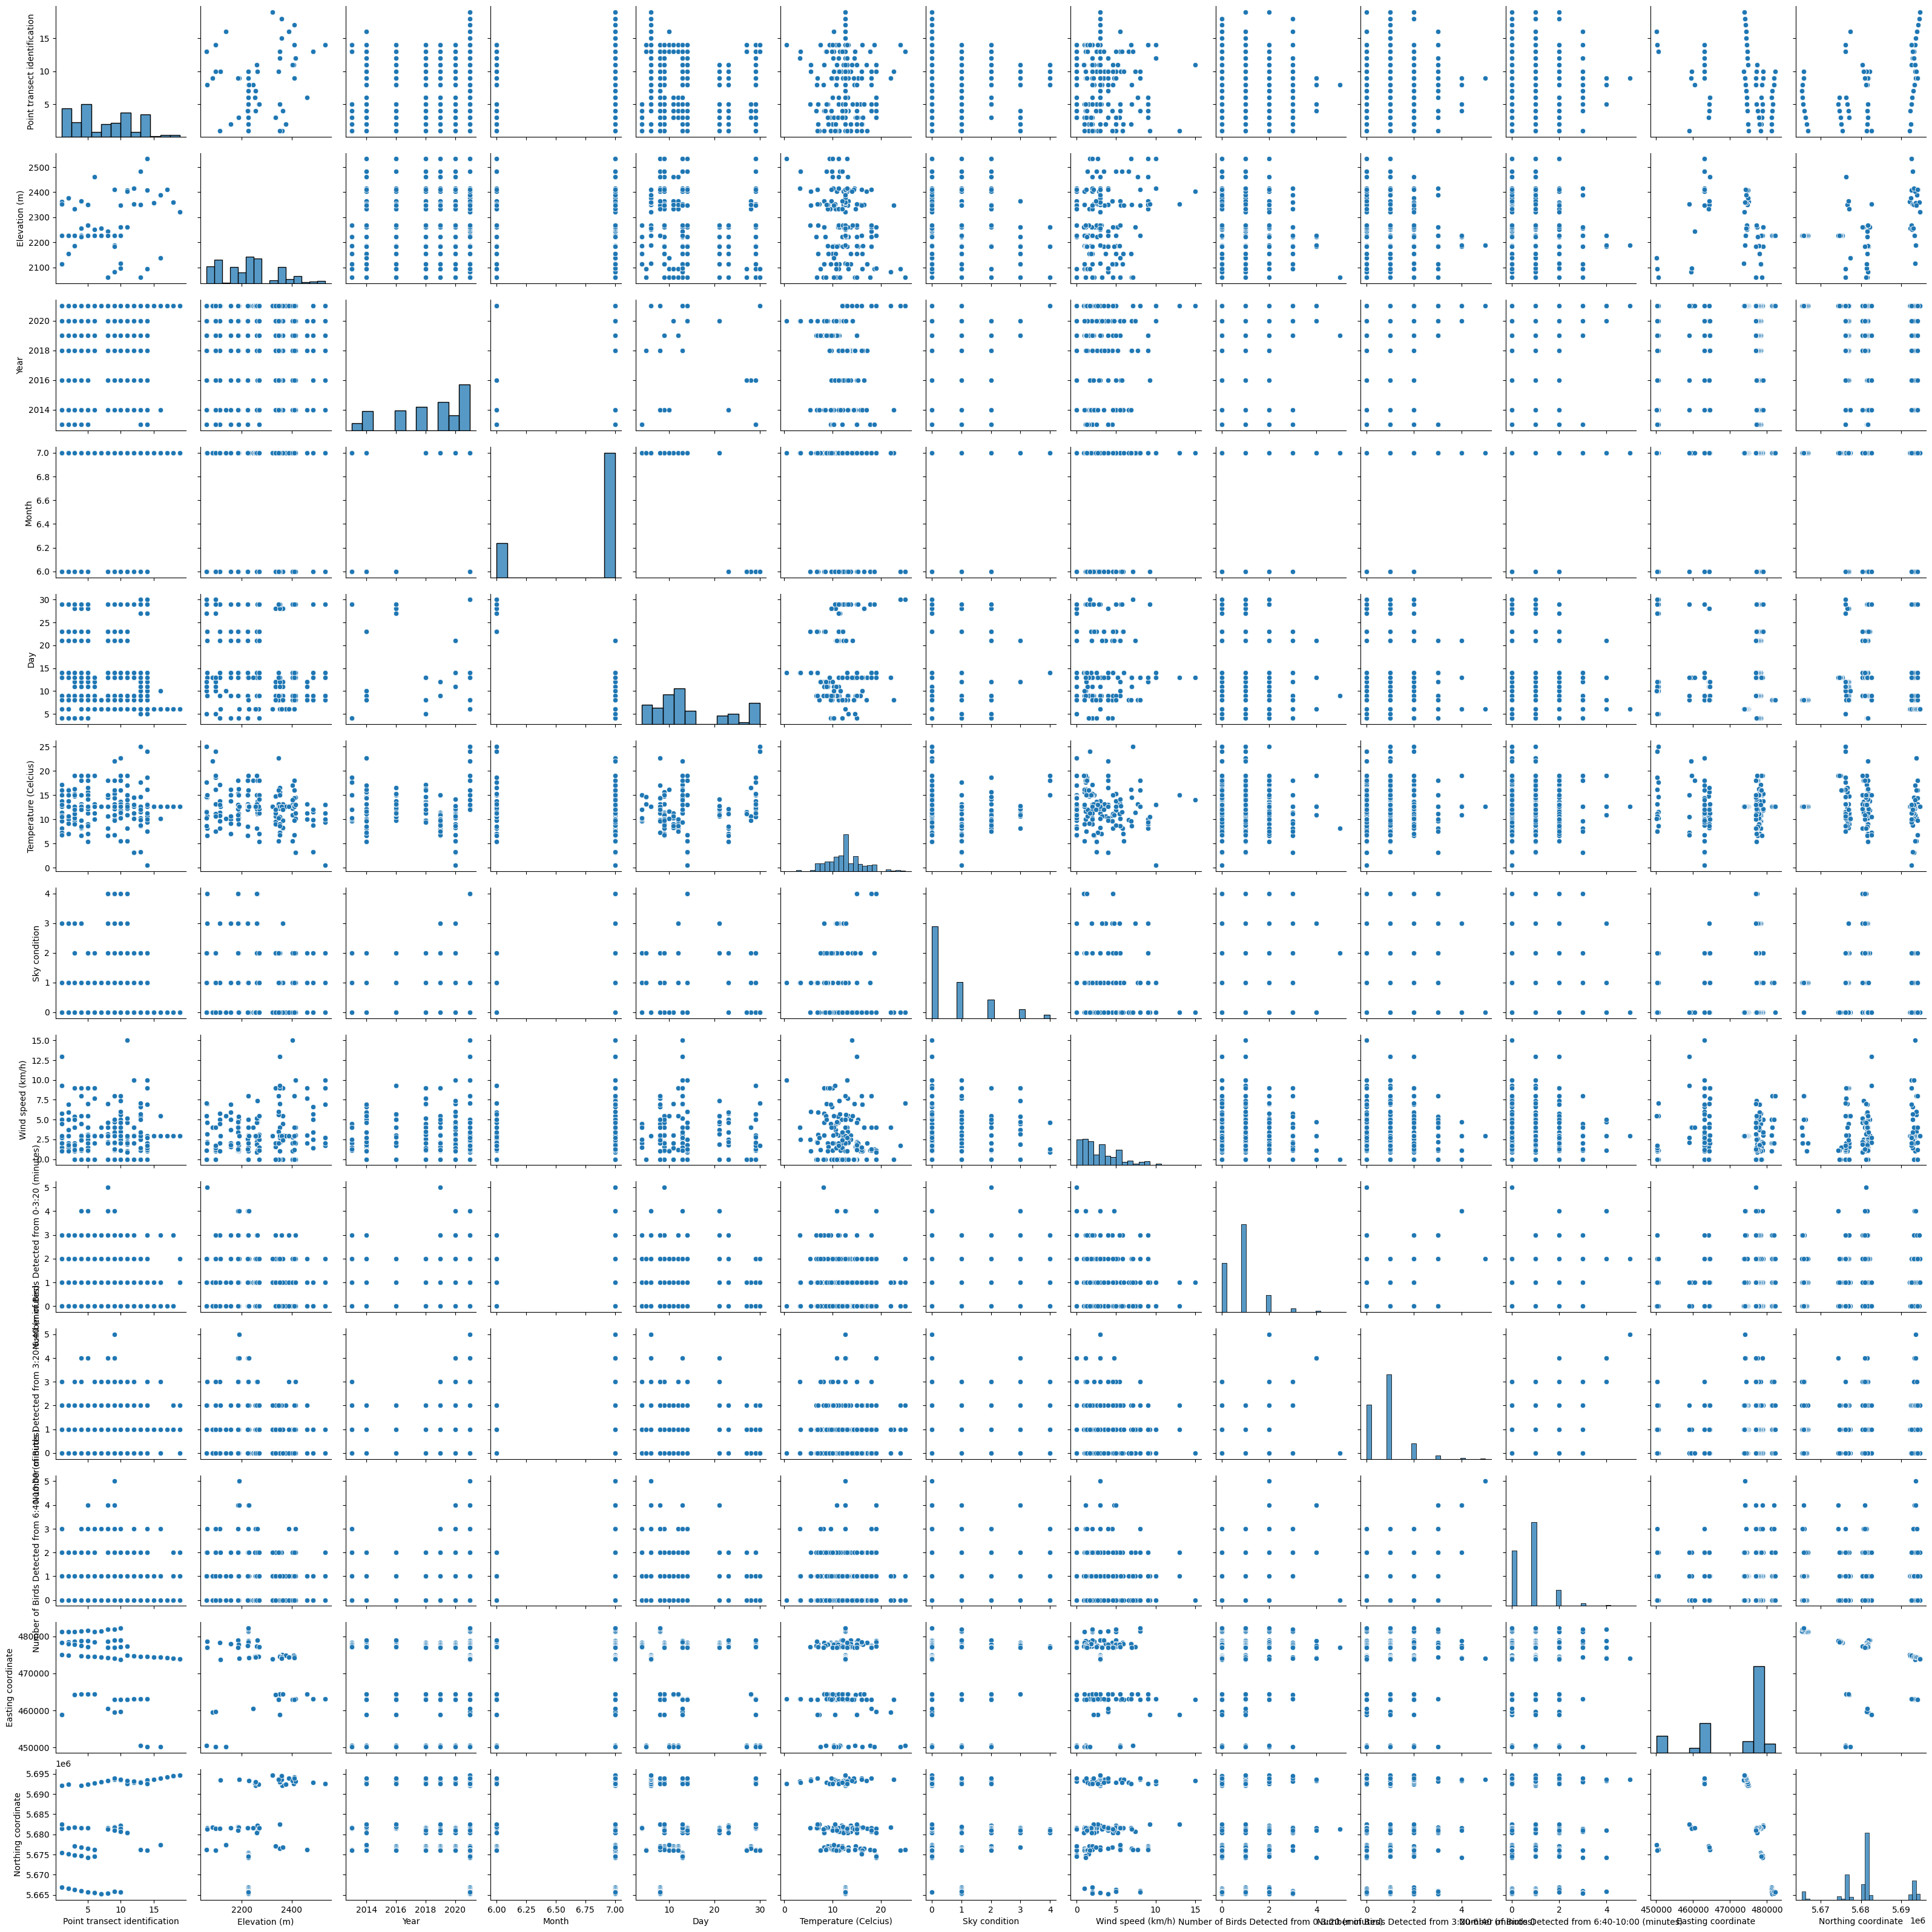

In [11]:
import seaborn as sns
sns.pairplot(birds)
plt.show()

5) Preparing data to be used as an input:

In [41]:
from sklearn.model_selection import train_test_split


#Let's combine the three columns to have a label in the dataframe
birds['label'] = birds['Number of Birds Detected from 0-3:20 (minutes)'] + \
                 birds['Number of Birds Detected from 3:20-6:40 (minutes)'] + \
                 birds['Number of Birds Detected from 6:40-10:00 (minutes)']
birds = birds.drop(['Number of Birds Detected from 0-3:20 (minutes)', 
                   'Number of Birds Detected from 3:20-6:40 (minutes)', 
                   'Number of Birds Detected from 6:40-10:00 (minutes)'], axis =1)

x = birds.drop(columns=['label'])
y = birds['label']
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, train_size = 0.7)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, train_size = 0.5)

# Since this is a regression problem, we cannot use 'stratify' to the 'label' column

6) Using 'pandas' to save the dataset in three different 'csv' files:
   

In [49]:
birds_training_data = pd.concat([x_train, y_train], axis =1)
birds_training_data.to_csv('birds_training_data.csv', index = False)
birds_validating_data = pd.concat([x_val, y_val], axis = 1)
birds_validating_data.to_csv('birds_validating_data.csv', index = False)
birds_testing_data = pd.concat([x_test, y_test], axis = 1)
birds_testing_data.to_csv('birds_testing_data.csv', index = False)

In [50]:
birds_training_data.head()

,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Easting coordinate,Northing coordinate,label
555,9,2411.0,2020,7,14,6.8000,1,0.000000,462970,5693974,1
641,2,2377.0,2021,7,6,12.6625,0,2.952204,474891,5692366,1
118,10,2261.0,2018,7,13,13.7000,0,2.500000,477137,5680688,1
717,11,2260.0,2021,7,14,19.0000,4,0.900000,477339,5680336,3
366,8,2060.0,2020,7,21,10.7000,3,3.200000,476955,5681271,2


In [51]:
birds_training_data.size


6028

In [52]:
birds_validating_data.head()

,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Easting coordinate,Northing coordinate,label
50,1,2113.000000,2013,7,4,9.6000,0,4.5,478277,5681410,2
485,10,2348.000000,2016,6,29,12.8000,0,5.6,462978,5693673,1
630,9,2226.577622,2021,7,8,12.6625,1,5.0,481944,5665782,2
567,10,2096.000000,2021,7,13,19.0000,0,4.0,459588,5681399,1
406,1,2352.000000,2019,7,9,6.8000,0,2.1,458925,5682533,1


In [53]:
birds_validating_data.size

1287

In [54]:
birds_testing_data.head()

,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Easting coordinate,Northing coordinate,label
327,5,2269.0,2019,7,9,7.0,1,3.1,477185,5681655,5
437,13,2059.0,2020,7,11,10.3,0,0.0,450545,5676203,2
419,13,2059.0,2016,6,27,11.5,0,0.0,450545,5676203,3
23,5,2351.0,2014,7,9,15.7,2,1.0,464367,5676510,2
297,4,2223.0,2020,7,21,12.8,3,0.0,477481,5681611,10


In [55]:
birds_testing_data.size

1298